In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EXPLORATORY DATA ANALYSIS

## Data Cleaning :

In [6]:
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [8]:
#dropping Lead Number and Prospect ID as they are unique value columns.

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [13]:
df.shape

(9240, 28)

In [14]:
#checking null values percentage

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Analysis:

In [15]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

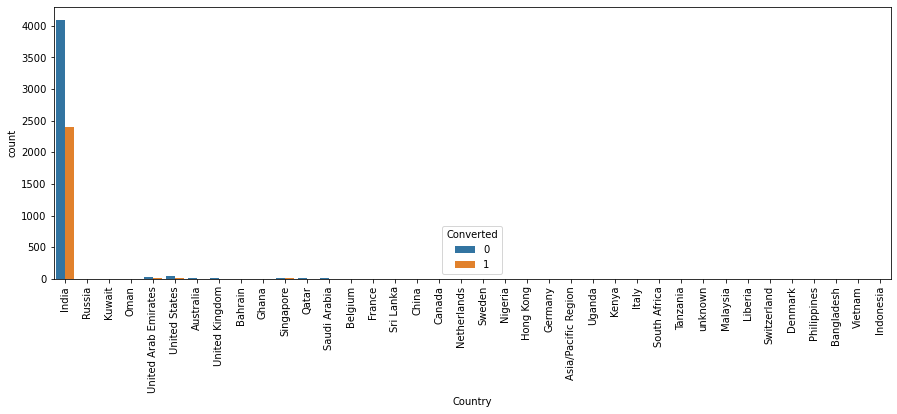

In [16]:
# plotting spread of the country column
plt.figure(figsize= (15,5))
c1 = sns.countplot(df.Country, hue = df.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [17]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India 
# creating a list for columns to drop


df['Country'] = df['Country'].replace(np.nan,'India')

col_drop = ["Country"]

In [18]:
#checking for Specialization
df["Specialization"].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#as it is evident that max number of NaN values noted in this column but the the remaining data also had valid spred assigning null wth not disclose

df["Specialization"] = df["Specialization"].replace(np.nan, "not disclosed")

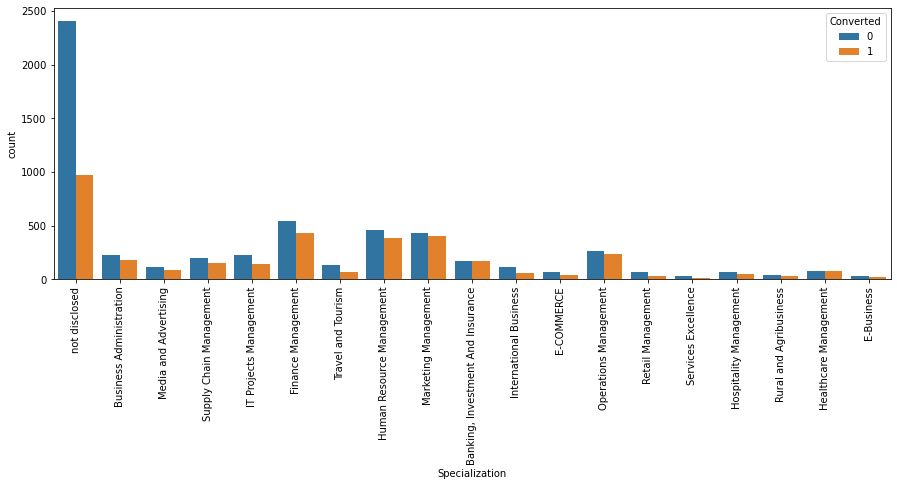

In [20]:
# plotting spread of the Specialization column
plt.figure(figsize= (15,5))
c1 = sns.countplot(df.Specialization, hue = df.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

As it is evident that high number of leads getting converted from Management it is a significant variable and cant be dropped because of high non disclosure values

In [21]:
# combining management sections as they dispaly similar trend

df["Specialization"] = df["Specialization"].replace(['Finance Management','Human Resource Management', 'Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',   'Retail Management'] ,'Management_Specializations')  

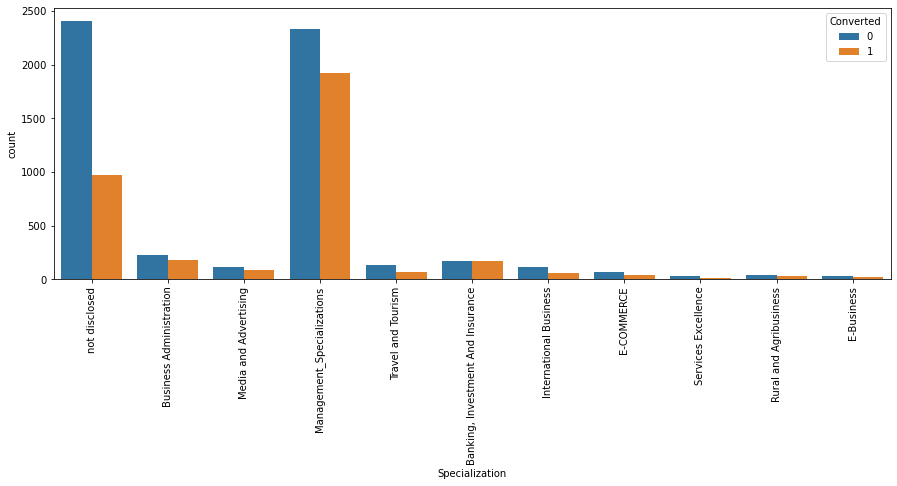

In [22]:
# visuvalizing the result
plt.figure(figsize= (15,5))
c1 = sns.countplot(df.Specialization, hue = df.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()


In [23]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [25]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

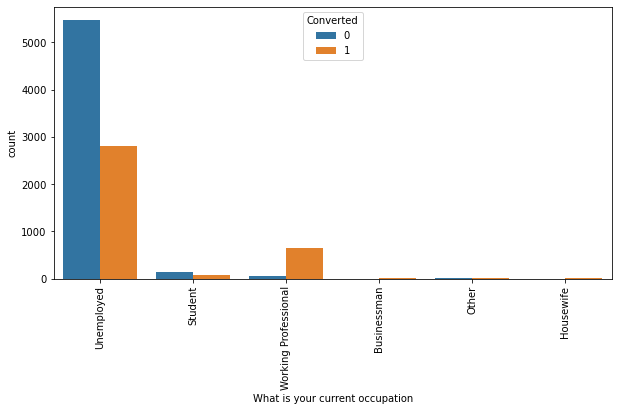

In [26]:
#visualizing count of Variable based on Converted value
plt.figure(figsize= (10,5))
c1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [28]:
df["What matters most to you in choosing a course"].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

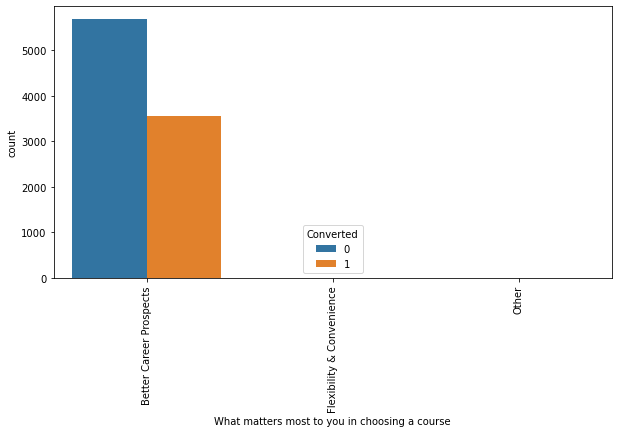

In [30]:
#visualizing count of Variable based on Converted value
plt.figure(figsize= (10,5))
c1=sns.countplot(df["What matters most to you in choosing a course"], hue=df.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
#from the above representation it is clear that most the target present in single variable, so its better to drop this colums

col_drop.append("What matters most to you in choosing a course")
print(col_drop)

['Country', 'What matters most to you in choosing a course']


In [32]:
df["Tags"].value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [33]:
df["Tags"] = df["Tags"].replace(np.nan, "not mentioned")

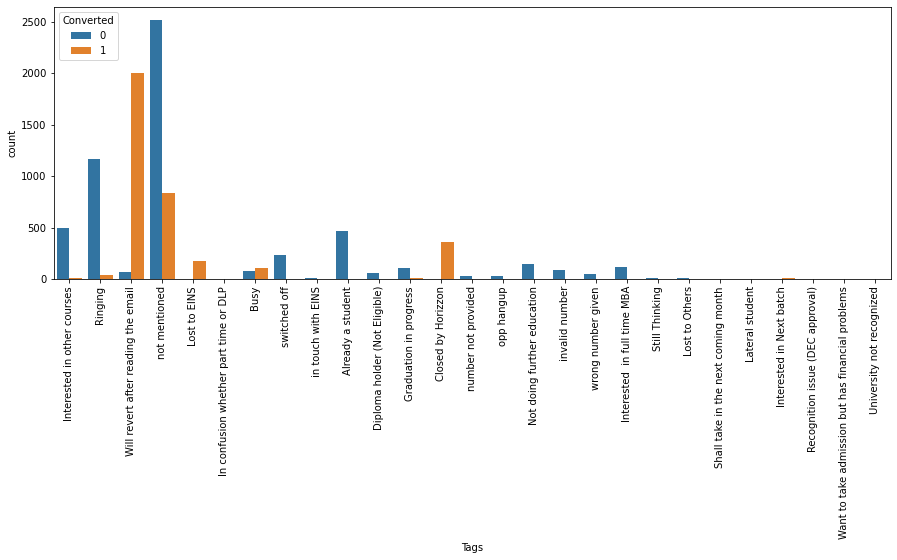

In [34]:
plt.figure(figsize=[15,5])
c1= sns.countplot(df["Tags"], hue= df.Converted)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

In [35]:
# by plotting the data this looks quite useful but some high numb low freq points are there combining them with "others" for better ref

df["Tags"] = df["Tags"].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given","opp hangup","number not provided","in touch with EINS",  "Lost to Others", "Still Thinking","Want to take admission but has financial problems","In confusion whether part time or DLP", "Interested in Next batch", "Lateral student", "Shall take in the next coming month", "University not recognized","Recognition issue (DEC approval)"], "others")

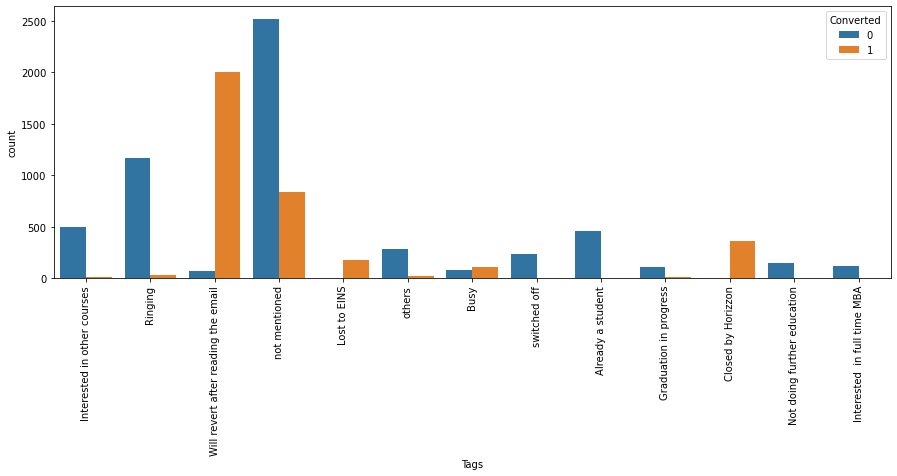

In [36]:
plt.figure(figsize=[15,5])
c1= sns.countplot(df["Tags"], hue= df.Converted)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

In [37]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

Maximum number of leads are generated by Google and Direct traffic. Conversion Rate of reference leads and leads through welingak website is high. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [39]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [41]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [42]:
df["City"].value_counts(dropna= False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
df["City"] = df["City"].replace(np.nan, "Mumbai")

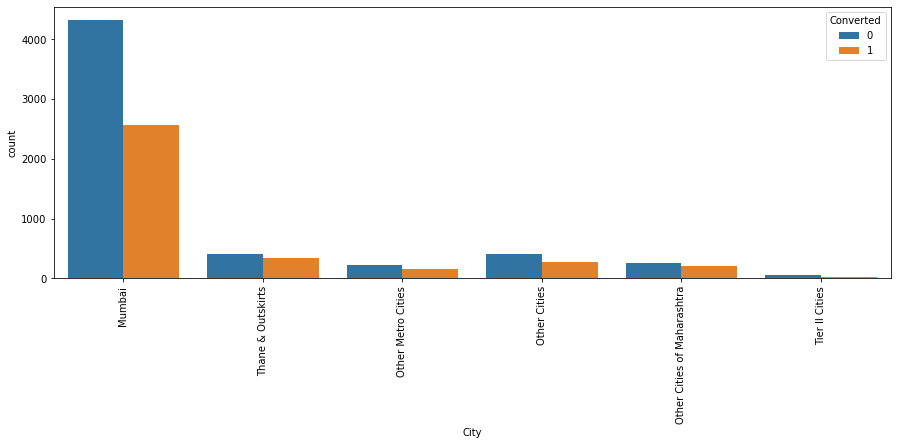

In [44]:
plt.figure(figsize=[15,5])
c1= sns.countplot(df["City"], hue= df.Converted)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

In [45]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [46]:
#Droping all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [47]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

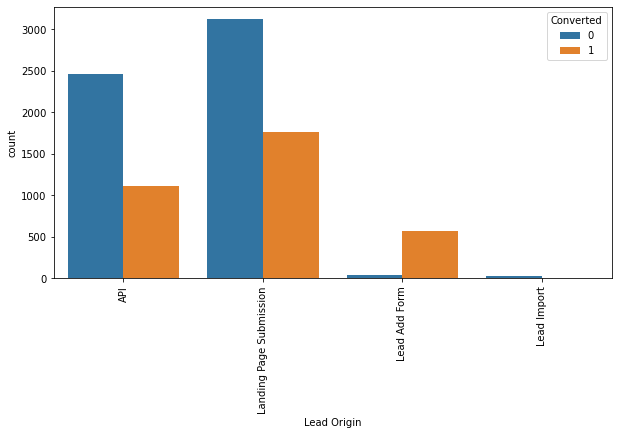

In [48]:


plt.figure(figsize=(10,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

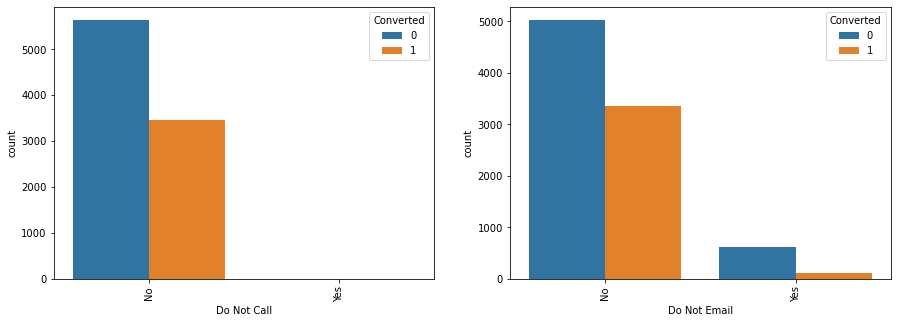

In [49]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

x1=plt.subplot(1, 2, 1)
x1=sns.countplot(df['Do Not Call'], hue=df.Converted)
x1.set_xticklabels(x1.get_xticklabels(),rotation=90)

x2=plt.subplot(1, 2, 2)
x2=sns.countplot(df['Do Not Email'], hue=df.Converted)
x2.set_xticklabels(x2.get_xticklabels(),rotation=90)
plt.show()

by above representation its clear to append the"Do Not Call" Column to the list of Columns to be Dropped since > 90% is of only one Value

In [50]:
col_drop.append("Do Not Call")
col_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [51]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [52]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_activity')

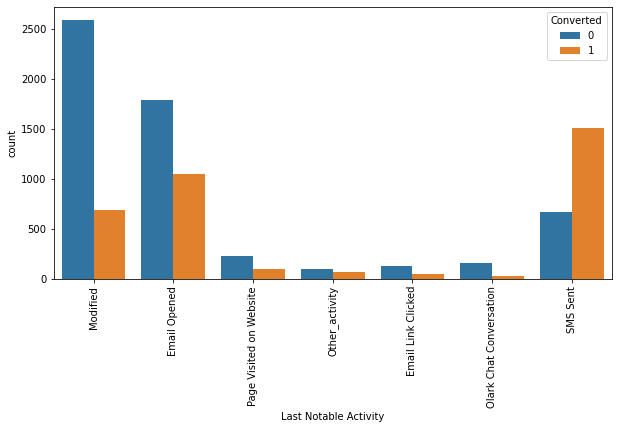

In [53]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (10,5))
x1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
x1.set_xticklabels(x1.get_xticklabels(),rotation=90)
plt.show()

### segregating imbalance variables

In [54]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [55]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [56]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [57]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [58]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [59]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [60]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [61]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [62]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [63]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [64]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [65]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [66]:
#adding imbalanced columns to the list of columns to be dropped

col_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [67]:
col_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [68]:
#dropping columns
df = df.drop(col_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Numerical Attributes Analysis:


In [176]:
#Check the % of Data that has Converted from entire data:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.92025019546521

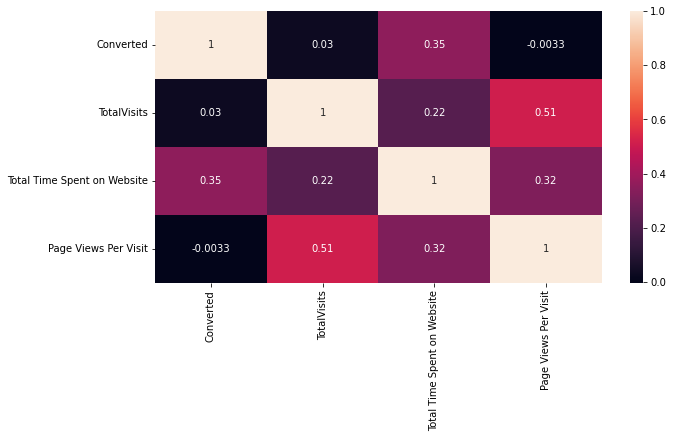

In [70]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,5))

# heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

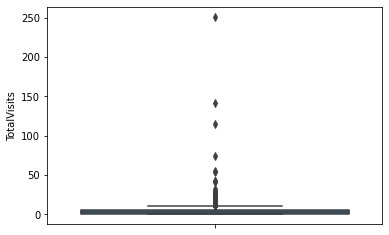

In [71]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [72]:
#as we can see the presence of outliers
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

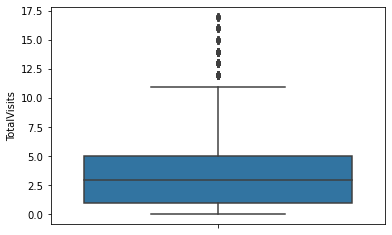

In [73]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [74]:
df.shape

(9020, 14)

In [75]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

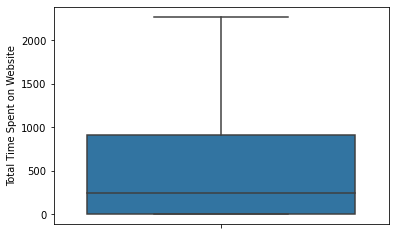

In [76]:
#visualizing spread of numeric variable

sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

As there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column



In [77]:
df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

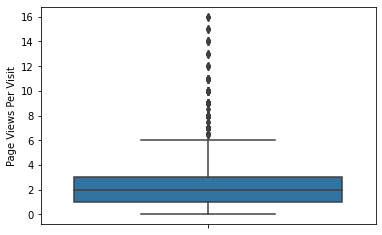

In [78]:
#visualizing spread of numeric variable

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

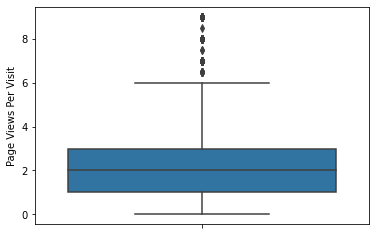

In [79]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
leads = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [80]:
df.shape

(8953, 14)

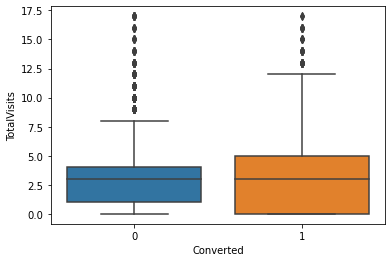

In [81]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference

1. Median for converted and not converted leads are close.
2. Nothng conclusive can be said on the basis of Total Visits

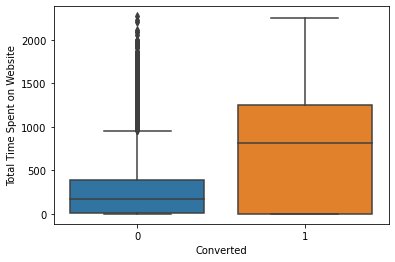

In [82]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

# Inference

1. Leads spending more time on the website are more likely to be converted.
2. should be made more engaging to make leads spend more time.

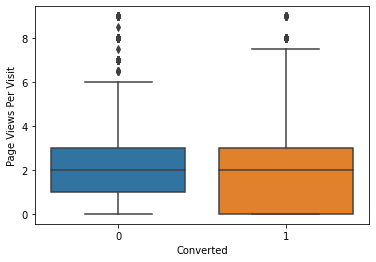

In [83]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Inference

1. Median for converted and not converted leads are close.
2. Nothng conclusive can be said on the basis of Page Views Per Visit

## Dummy Variable Creation:

In [84]:
#getting a list of categorical columns

catg_cols= df.select_dtypes(include=['object']).columns
catg_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [85]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [86]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [87]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not disclosed'], 1)
df = pd.concat([df, dummy], axis = 1)

In [88]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [89]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [90]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [92]:
#dropping the original columns after dummy variable creation

df.drop(catg_cols,1,inplace = True)

In [93]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train-Test Split :

In [94]:
from sklearn.model_selection import train_test_split

y = df["Converted"]
X= df.drop("Converted", axis =1)

In [95]:
X.shape

(8953, 61)

In [96]:
y.shape

(8953,)

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [98]:
X_train.shape

(6267, 61)

In [99]:
X_test.shape

(2686, 61)

### Scaling of Data:


In [100]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [101]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)



## Logistic Regression Model Building:

In [177]:
import statsmodels.api as sm

In [178]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [179]:


from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [180]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('What is your current occupation_Housewife', False, 3),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 4),
 ('City_Other Cities of Maharashtra', False, 4),
 ('City_Other Metro Cities', False, 4),
 ('City_Thane & Outskirts', False, 4),
 ('City_Tier II Cities', False, 4),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 3),
 ('Specialization_International Business', False, 4),
 ('Specia

In [106]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Wi

In [107]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       

In [108]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.0
Date:                Mon, 27 Feb 2023   Deviance:                       2364.0
Time:                        12:14:06   Pearson chi2:                 9.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7848      0.297     -6.000      0.000      -2.368      -1.202
Total Time Spent on Website                              1.0929      0.063     17.408      0.000       0.970       1.216
Lead Origin_Landing Page Submission                     -0.7060      0.153     -4.623      0.000      -1.005      -0.407
Lead Origin_Lead Add Form                                1.6508      1.021      1.617      0.106      -0.350       3.651
What is your current occupation_Working Professional     0.9343      0.420      2.223      0.026       0.110       1.758
Specialization_Travel and Tourism                       -0.9138      0.479     -1.908      0.056      -1.852       0.025
Lead Source_Direct Traffic                              -1.1628      0.223     -5.210      0.000      -1.600      -0.725
Lead Source_Google                                      -0.8391      0.180     -4.673      0.000      -1.191      -0.487
Lead Source_Organic Search                              -0.9303      0.216     -4.303      0.000      -1.354      -0.507
Lead Source_Reference                                   -1.1618      1.122     -1.036      0.300      -3.360       1.037
Lead Source_Referral Sites                              -1.2404      0.488     -2.542      0.011      -2.197      -0.284
Lead Source_Welingak Website                             3.3185      1.438      2.307      0.021       0.500       6.137
Last Activity_Email Bounced                             -1.1464      0.476     -2.410      0.016      -2.079      -0.214
Last Activity_Olark Chat Conversation                   -1.0577      0.305     -3.471      0.001      -1.655      -0.461
Last Activity_Page Visited on Website                   -0.6379      0.265     -2.406      0.016      -1.158      -0.118
Last Activity_SMS Sent                                   1.0254      0.249      4.119      0.000       0.537       1.513
Last Notable Activity_Email Link Clicked                -1.3424      0.475     -2.823      0.005      -2.274      -0.411
Last Notable Activity_Modified                          -1.0518      0.175     -6.020      0.000      -1.394      -0.709
Last Notable Activity_Olark Chat Conversation           -1.2319      0.571     -2.158      0.031      -2.351      -0.113
Last Notable Activity_SMS Sent                           1.1376      0.280      4.065      0.000       0.589       1.686
Tags_Already a student                                  -1.7742      0.775     -2.289      0.022      -3.293      -0.255
Tags_Busy                                                2.2162      0.342      6.487      0.000       1.547       2.886
Tags_Closed by Horizzon                                  8

In [109]:
col = col.drop("Tags_Interested  in full time MBA")

In [110]:
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_no

In [111]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.0
Date:                Mon, 27 Feb 2023   Deviance:                       2364.1
Time:                        12:14:06   Pearson chi2:                 9.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8086      0.278     -6.496      0.000      -2.354      -1.263
Total Time Spent on Website                              1.0925      0.063     17.411      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7059      0.153     -4.623      0.000      -1.005      -0.407
Lead Origin_Lead Add Form                                1.6505      1.021      1.617      0.106      -0.350       3.652
What is your current occupation_Working Professional     0.9270      0.418      2.216      0.027       0.107       1.747
Specialization_Travel and Tourism                       -0.9140      0.479     -1.909      0.056      -1.853       0.025
Lead Source_Direct Traffic                              -1.1615      0.223     -5.206      0.000      -1.599      -0.724
Lead Source_Google                                      -0.8391      0.180     -4.673      0.000      -1.191      -0.487
Lead Source_Organic Search                              -0.9312      0.216     -4.308      0.000      -1.355      -0.508
Lead Source_Reference                                   -1.1579      1.122     -1.032      0.302      -3.357       1.041
Lead Source_Referral Sites                              -1.2402      0.488     -2.542      0.011      -2.196      -0.284
Lead Source_Welingak Website                             3.3189      1.438      2.307      0.021       0.500       6.138
Last Activity_Email Bounced                             -1.1460      0.476     -2.410      0.016      -2.078      -0.214
Last Activity_Olark Chat Conversation                   -1.0565      0.305     -3.468      0.001      -1.654      -0.459
Last Activity_Page Visited on Website                   -0.6373      0.265     -2.404      0.016      -1.157      -0.118
Last Activity_SMS Sent                                   1.0264      0.249      4.123      0.000       0.538       1.514
Last Notable Activity_Email Link Clicked                -1.3424      0.476     -2.823      0.005      -2.274      -0.410
Last Notable Activity_Modified                          -1.0526      0.175     -6.027      0.000      -1.395      -0.710
Last Notable Activity_Olark Chat Conversation           -1.2326      0.571     -2.160      0.031      -2.351      -0.114
Last Notable Activity_SMS Sent                           1.1394      0.280      4.073      0.000       0.591       1.688
Tags_Already a student                                  -1.7503      0.768     -2.280      0.023      -3.255      -0.245
Tags_Busy                                                2.2386      0.327      6.841      0.000       1.597       2.880
Tags_Closed by Horizzon                                  8

In [112]:
col = col.drop("Tags_Not doing further education")

In [113]:
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_not mentioned',
       'Tags_switched 

In [114]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.3
Date:                Mon, 27 Feb 2023   Deviance:                       2364.5
Time:                        12:14:06   Pearson chi2:                 9.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8530      0.271     -6.834      0.000      -2.384      -1.322
Total Time Spent on Website                              1.0930      0.063     17.417      0.000       0.970       1.216
Lead Origin_Landing Page Submission                     -0.7073      0.153     -4.632      0.000      -1.007      -0.408
Lead Origin_Lead Add Form                                1.6500      1.021      1.615      0.106      -0.352       3.652
What is your current occupation_Working Professional     0.9306      0.419      2.221      0.026       0.110       1.752
Specialization_Travel and Tourism                       -0.9109      0.479     -1.900      0.057      -1.851       0.029
Lead Source_Direct Traffic                              -1.1615      0.223     -5.205      0.000      -1.599      -0.724
Lead Source_Google                                      -0.8388      0.180     -4.671      0.000      -1.191      -0.487
Lead Source_Organic Search                              -0.9307      0.216     -4.305      0.000      -1.354      -0.507
Lead Source_Reference                                   -1.1518      1.123     -1.026      0.305      -3.352       1.049
Lead Source_Referral Sites                              -1.2395      0.488     -2.539      0.011      -2.196      -0.283
Lead Source_Welingak Website                             3.3208      1.439      2.308      0.021       0.501       6.141
Last Activity_Email Bounced                             -1.1627      0.473     -2.456      0.014      -2.090      -0.235
Last Activity_Olark Chat Conversation                   -1.0554      0.305     -3.464      0.001      -1.653      -0.458
Last Activity_Page Visited on Website                   -0.6473      0.264     -2.450      0.014      -1.165      -0.130
Last Activity_SMS Sent                                   1.0263      0.249      4.124      0.000       0.539       1.514
Last Notable Activity_Email Link Clicked                -1.3417      0.476     -2.820      0.005      -2.274      -0.409
Last Notable Activity_Modified                          -1.0530      0.175     -6.033      0.000      -1.395      -0.711
Last Notable Activity_Olark Chat Conversation           -1.2333      0.571     -2.161      0.031      -2.352      -0.114
Last Notable Activity_SMS Sent                           1.1445      0.280      4.094      0.000       0.597       1.692
Tags_Already a student                                  -1.7049      0.765     -2.229      0.026      -3.204      -0.205
Tags_Busy                                                2.2820      0.321      7.099      0.000       1.652       2.912
Tags_Closed by Horizzon                                  8

In [115]:
col = col.drop("Lead Source_Reference")

In [116]:
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_not mentioned',
       'Tags_switched off'],
      dtype='object')


In [117]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.8
Date:                Mon, 27 Feb 2023   Deviance:                       2365.6
Time:                        12:14:06   Pearson chi2:                 9.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6137
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8642      0.271     -6.873      0.000      -2.396      -1.333
Total Time Spent on Website                              1.0925      0.063     17.419      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7057      0.153     -4.625      0.000      -1.005      -0.407
Lead Origin_Lead Add Form                                0.7209      0.454      1.586      0.113      -0.170       1.612
What is your current occupation_Working Professional     0.9195      0.418      2.200      0.028       0.100       1.739
Specialization_Travel and Tourism                       -0.9088      0.479     -1.898      0.058      -1.847       0.030
Lead Source_Direct Traffic                              -1.1590      0.223     -5.198      0.000      -1.596      -0.722
Lead Source_Google                                      -0.8372      0.179     -4.666      0.000      -1.189      -0.486
Lead Source_Organic Search                              -0.9286      0.216     -4.298      0.000      -1.352      -0.505
Lead Source_Referral Sites                              -1.2376      0.488     -2.538      0.011      -2.193      -0.282
Lead Source_Welingak Website                             4.2496      1.111      3.825      0.000       2.072       6.427
Last Activity_Email Bounced                             -1.1649      0.473     -2.464      0.014      -2.092      -0.238
Last Activity_Olark Chat Conversation                   -1.0581      0.304     -3.477      0.001      -1.655      -0.462
Last Activity_Page Visited on Website                   -0.6488      0.264     -2.457      0.014      -1.166      -0.131
Last Activity_SMS Sent                                   1.0178      0.249      4.091      0.000       0.530       1.505
Last Notable Activity_Email Link Clicked                -1.3439      0.476     -2.821      0.005      -2.277      -0.410
Last Notable Activity_Modified                          -1.0486      0.174     -6.012      0.000      -1.390      -0.707
Last Notable Activity_Olark Chat Conversation           -1.2302      0.570     -2.157      0.031      -2.348      -0.112
Last Notable Activity_SMS Sent                           1.1524      0.279      4.123      0.000       0.605       1.700
Tags_Already a student                                  -1.6957      0.765     -2.216      0.027      -3.195      -0.196
Tags_Busy                                                2.2906      0.322      7.123      0.000       1.660       2.921
Tags_Closed by Horizzon                                  8.6389      1.045      8.270      0.000       6.592      10.686
Tags_Interested in other courses                        -0

In [118]:
col = col.drop("Lead Origin_Lead Add Form")

In [119]:
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_not mentioned',
       'Tags_switched off'],
      dtype='object')


In [120]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1184.1
Date:                Mon, 27 Feb 2023   Deviance:                       2368.2
Time:                        12:14:07   Pearson chi2:                 9.39e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6136
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7958      0.267     -6.728      0.000      -2.319      -1.273
Total Time Spent on Website                              1.0928      0.063     17.388      0.000       0.970       1.216
Lead Origin_Landing Page Submission                     -0.7172      0.153     -4.693      0.000      -1.017      -0.418
What is your current occupation_Working Professional     0.9424      0.420      2.243      0.025       0.119       1.766
Specialization_Travel and Tourism                       -0.9200      0.482     -1.908      0.056      -1.865       0.025
Lead Source_Direct Traffic                              -1.2064      0.221     -5.452      0.000      -1.640      -0.773
Lead Source_Google                                      -0.8814      0.177     -4.973      0.000      -1.229      -0.534
Lead Source_Organic Search                              -0.9761      0.214     -4.556      0.000      -1.396      -0.556
Lead Source_Referral Sites                              -1.2837      0.489     -2.627      0.009      -2.241      -0.326
Lead Source_Welingak Website                             4.9317      1.024      4.817      0.000       2.925       6.938
Last Activity_Email Bounced                             -1.1675      0.474     -2.461      0.014      -2.097      -0.238
Last Activity_Olark Chat Conversation                   -1.0883      0.305     -3.568      0.000      -1.686      -0.491
Last Activity_Page Visited on Website                   -0.6496      0.265     -2.455      0.014      -1.168      -0.131
Last Activity_SMS Sent                                   1.0342      0.248      4.164      0.000       0.547       1.521
Last Notable Activity_Email Link Clicked                -1.3557      0.473     -2.867      0.004      -2.282      -0.429
Last Notable Activity_Modified                          -1.0536      0.175     -6.032      0.000      -1.396      -0.711
Last Notable Activity_Olark Chat Conversation           -1.2274      0.572     -2.147      0.032      -2.348      -0.107
Last Notable Activity_SMS Sent                           1.1502      0.279      4.118      0.000       0.603       1.698
Tags_Already a student                                  -1.7241      0.765     -2.253      0.024      -3.224      -0.224
Tags_Busy                                                2.2664      0.321      7.063      0.000       1.637       2.895
Tags_Closed by Horizzon                                  8.7882      1.041      8.444      0.000       6.748      10.828
Tags_Interested in other courses                        -0.6967      0.471     -1.478      0.139      -1.621       0.227
Tags_Lost to EINS                                        7

In [121]:
col = col.drop("Tags_Interested in other courses")
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_not mentioned',
       'Tags_switched off'],
      dtype='object')


In [122]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.3
Date:                Mon, 27 Feb 2023   Deviance:                       2370.5
Time:                        12:14:07   Pearson chi2:                 9.45e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6134
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0019      0.238     -8.422      0.000      -2.468      -1.536
Total Time Spent on Website                              1.0899      0.063     17.377      0.000       0.967       1.213
Lead Origin_Landing Page Submission                     -0.7034      0.152     -4.614      0.000      -1.002      -0.405
What is your current occupation_Working Professional     0.9065      0.412      2.202      0.028       0.099       1.713
Specialization_Travel and Tourism                       -0.9278      0.483     -1.922      0.055      -1.874       0.018
Lead Source_Direct Traffic                              -1.1997      0.221     -5.424      0.000      -1.633      -0.766
Lead Source_Google                                      -0.8862      0.177     -5.004      0.000      -1.233      -0.539
Lead Source_Organic Search                              -0.9717      0.214     -4.538      0.000      -1.391      -0.552
Lead Source_Referral Sites                              -1.3349      0.487     -2.739      0.006      -2.290      -0.380
Lead Source_Welingak Website                             4.9342      1.024      4.819      0.000       2.927       6.941
Last Activity_Email Bounced                             -1.1663      0.474     -2.458      0.014      -2.096      -0.236
Last Activity_Olark Chat Conversation                   -1.0808      0.304     -3.554      0.000      -1.677      -0.485
Last Activity_Page Visited on Website                   -0.6456      0.264     -2.442      0.015      -1.164      -0.127
Last Activity_SMS Sent                                   1.0482      0.248      4.229      0.000       0.562       1.534
Last Notable Activity_Email Link Clicked                -1.3535      0.473     -2.859      0.004      -2.281      -0.426
Last Notable Activity_Modified                          -1.0683      0.174     -6.134      0.000      -1.410      -0.727
Last Notable Activity_Olark Chat Conversation           -1.2400      0.571     -2.171      0.030      -2.360      -0.120
Last Notable Activity_SMS Sent                           1.1463      0.279      4.106      0.000       0.599       1.693
Tags_Already a student                                  -1.5219      0.756     -2.014      0.044      -3.003      -0.041
Tags_Busy                                                2.4593      0.301      8.167      0.000       1.869       3.049
Tags_Closed by Horizzon                                  8.9975      1.033      8.706      0.000       6.972      11.023
Tags_Lost to EINS                                        7.5797      0.647     11.711      0.000       6.311       8.848
Tags_Ringing                                            -1

In [123]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.88
12,Last Activity_SMS Sent,6.85
1,Lead Origin_Landing Page Submission,4.61
4,Lead Source_Direct Traffic,4.12
5,Lead Source_Google,3.05
14,Last Notable Activity_Modified,2.82
23,Tags_not mentioned,2.20
22,Tags_Will revert after reading the email,2.05
10,Last Activity_Olark Chat Conversation,2.05
6,Lead Source_Organic Search,1.78


In [125]:
col = col.drop("Last Notable Activity_SMS Sent")

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.61
4,Lead Source_Direct Traffic,4.10
5,Lead Source_Google,3.04
22,Tags_not mentioned,2.19
14,Last Notable Activity_Modified,2.14
21,Tags_Will revert after reading the email,2.02
10,Last Activity_Olark Chat Conversation,1.90
6,Lead Source_Organic Search,1.77
12,Last Activity_SMS Sent,1.74
20,Tags_Ringing,1.56


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [127]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.255270
4696    0.031080
3274    0.406763
2164    0.005455
1667    0.992243
7024    0.225658
8018    0.027820
778     0.063724
6942    0.006051
4440    0.072622
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25526993, 0.03107954, 0.40676308, 0.00545479, 0.99224289,
       0.2256585 , 0.02782007, 0.06372414, 0.00605057, 0.0726219 ])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,1,0.255270,9196
1,0,0.031080,4696
2,0,0.406763,3274
3,0,0.005455,2164
4,1,0.992243,1667


In [130]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.255270,9196,0
1,0,0.031080,4696,0
2,0,0.406763,3274,0
3,0,0.005455,2164,0
4,1,0.992243,1667,1


In [131]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3720  162]
 [ 279 2106]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9296314025849689


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8830188679245283

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9582689335394127

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04173106646058733


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.9285714285714286


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9302325581395349


## PLOTTING ROC CURVE

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

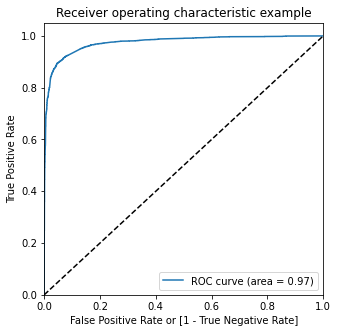

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.255270,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031080,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.406763,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.005455,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.992243,1667,1,1,1,1,1,1,1,1,1,1,1


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.859103  0.972327  0.789541
0.2   0.2  0.898197  0.952201  0.865018
0.3   0.3  0.923727  0.915723  0.928645
0.4   0.4  0.928834  0.898952  0.947192
0.5   0.5  0.929631  0.883019  0.958269
0.6   0.6  0.928514  0.863732  0.968315
0.7   0.7  0.925164  0.841509  0.976558
0.8   0.8  0.907452  0.781551  0.984802
0.9   0.9  0.889102  0.723690  0.990726


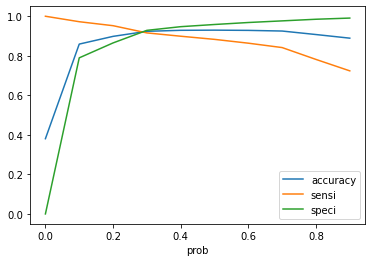

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.255270,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031080,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.406763,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.005455,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.992243,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.255270,9196,0,26
1,0,0.031080,4696,0,3
2,0,0.406763,3274,1,41
3,0,0.005455,2164,0,1
4,1,0.992243,1667,1,99


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9237274613052497

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3605,  277],
       [ 201, 2184]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9157232704402516

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9286450283359093

Observation:


So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.29%

Sensitivity : 91.70%

Specificity : 92.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07135497166409067


In [153]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8874441284030882


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9471886495007882


In [155]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9285714285714286

In [156]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8830188679245283

In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.8874441284030882

In [159]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9157232704402516

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

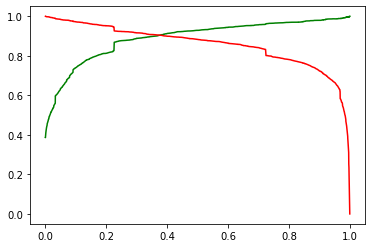

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off
7681,0.575687,-0.311318,0.092860,0.920499,-0.261566,-0.057983,-0.038619,-0.038619,-0.165964,0.360549,...,-0.186195,-0.109806,-0.116554,-0.251677,-0.151157,-0.133453,2.525692,-0.535162,-0.743975,-0.158716
984,-0.090676,-0.550262,0.356568,0.920499,-0.261566,-0.057983,-0.038619,-0.038619,-0.165964,0.360549,...,-0.186195,-0.109806,-0.116554,-0.251677,-0.151157,-0.133453,-0.395931,-0.535162,-0.743975,-0.158716
8135,-0.423857,0.812462,-0.170849,0.920499,-0.261566,-0.057983,-0.038619,-0.038619,-0.165964,0.360549,...,-0.186195,-0.109806,-0.116554,-0.251677,-0.151157,-0.133453,-0.395931,-0.535162,1.344131,-0.158716
6915,0.242505,-0.628665,-0.170849,0.920499,-0.261566,-0.057983,-0.038619,-0.038619,-0.165964,0.360549,...,-0.186195,-0.109806,-0.116554,-0.251677,-0.151157,-0.133453,2.525692,-0.535162,-0.743975,-0.158716
2712,-0.090676,-0.421456,0.356568,-1.086368,-0.261566,-0.057983,-0.038619,-0.038619,-0.165964,0.360549,...,-0.186195,-0.109806,-0.116554,-0.251677,-0.151157,-0.133453,-0.395931,1.868593,-0.743975,-0.158716


In [164]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off
7681,-0.311318,0.920499,-0.303101,-0.157479,1.590461,-0.685102,-0.383253,-0.109806,-0.108056,-0.200696,...,-0.751237,-0.147246,-0.219068,-0.140506,-0.186195,-0.151157,2.525692,-0.535162,-0.743975,-0.158716
984,-0.550262,0.920499,-0.303101,-0.157479,-0.628748,-0.685102,2.609241,-0.109806,-0.108056,-0.200696,...,1.331139,-0.147246,4.564800,-0.140506,-0.186195,-0.151157,-0.395931,-0.535162,-0.743975,-0.158716
8135,0.812462,0.920499,-0.303101,-0.157479,1.590461,-0.685102,-0.383253,-0.109806,-0.108056,-0.200696,...,-0.751237,-0.147246,-0.219068,-0.140506,-0.186195,-0.151157,-0.395931,-0.535162,1.344131,-0.158716
6915,-0.628665,0.920499,-0.303101,-0.157479,-0.628748,1.459636,-0.383253,-0.109806,-0.108056,-0.200696,...,-0.751237,-0.147246,-0.219068,-0.140506,-0.186195,-0.151157,2.525692,-0.535162,-0.743975,-0.158716
2712,-0.421456,-1.086368,-0.303101,-0.157479,-0.628748,1.459636,-0.383253,-0.109806,-0.108056,-0.200696,...,-0.751237,-0.147246,-0.219068,-0.140506,-0.186195,-0.151157,-0.395931,1.868593,-0.743975,-0.158716


## PREDICTIONS ON TEST SET

In [168]:
X_test = X_train[col]

In [169]:
X_test_sm = sm.add_constant(X_test)  # add a constant column to the test data


In [170]:
X_train_sm.shape

(6267, 26)

In [171]:
X_test_sm.shape

(6267, 25)

In [175]:
X_test_sm.columns

Index(['const', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_not mentioned',
       'Tags_switched off'],
      dtype='object')